##

In [ ]:
#Импорт библиотек
!pip install sweetviz

import gc

import random as random

import sweetviz as sv

import pandas as pd

import numpy as np

import pandas as pd

import tensorflow as tf

from numpy import dot

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad, RMSprop

from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, MaxPooling1D

from tensorflow.keras import utils

from keras.callbacks import  ReduceLROnPlateau,  EarlyStopping , ModelCheckpoint

from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 27.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Загружаем датасет



data_1 = pd.read_excel('/content/drive/MyDrive/output_top.xlsx',sheet_name='Sheet1')
data_2 = pd.read_excel('/content/drive/MyDrive/output_top.xlsx',sheet_name='Sheet1')
#data_3 = pd.read_excel('/content/drive/MyDrive/output_top.xlsx',sheet_name='Sheet1')

#data_1 = pd.read_excel('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1KYddMWCJIgqmoIeIZrgpIQzDG-WWnjQ1',sheet_name='Sheet1')


In [ ]:
def podbor(L,
           l1,
           l2,
           l3,
           a0,
           c1,
           c2,
           c3,
           c4):

 rez = 0
 if L <= l1:
   rez = a0 + L*c1/l1
 else:
   if (L > l1) and (L <= l2):
      rez = a0 + c1 -1 + c4**(1/c2*(L-l1))
   else:
      rez = a0 + c1 -1 + c4**(1/c2*(L-l1)) + (l - l2)*(c3+ a0 - (a0 + c1 - 1 + c4**(1/c2*(L-l1))))/(l3 - l2)

 return rez

In [ ]:
def podbor2(l3)
  for i in range(l1-100,l2+100)


## Работа с данными

In [ ]:
#Удаляем все лишние  данные
data_1 = data_1.drop(columns=['Н_Ло','Н_Се','Секция'], errors='ignore')
#data_turning = data_turning.drop(columns=['Секция','Н_Ло','Н_Се','Н_серии','Н_КП','Номер'], errors='ignore')
#data_wear = data_wear.drop(columns=['Номер','Толщина гребня на начало', 'Толщина гребня на конец'], errors='ignore')

In [ ]:

print(data_1.shape)

(13363, 29)


In [ ]:
#Соединяем листы и удаляем повторяющиеся столбцы
#data_1 = pd.concat([data_wear,data_turning,data_total], axis=1)
data_1 = data_1.drop(columns= ['Причина','Вид причины','Unnamed: 0','Дирекция','Квартал','Год','Дата обточки','Начало','Конец','ТТ',
                                    'Н_ЦО', 'Н_Ди'], errors='ignore')
data_1 = data_1.fillna(0)
data_1.columns

Index(['Н_КП', 'Номер', 'Н_серии', 'Период', 'Износ',
       'Толщина гребня на начало', 'Толщина гребня на конец',
       'Пробег за период', 'Пробег на начало', 'Пробег на конец', 'Н_КП.1',
       'Н_Се.1', 'Н_Ло.1', 'Н_серии.1', 'Номер.1', 'Секция.1', 'Н_ВП', 'Н_Пр',
       'Номер места'],
      dtype='object')

In [ ]:
#Избавляемся от дубликатов и нулевых значений, выброса
data_1.drop_duplicates()
#data_1 = data_1[Износ < 25]
data_1 = data_1.loc[~data_1['Пробег за период'].isin([0])]
data_1 = data_1.loc[~data_1['Износ'].isin([0])]


In [ ]:
print(data_1.shape)
print(max(data_1['Износ']))
print(data_1['Износ'])

data_1

(13174, 19)
8.0
0        2.25
1        1.50
2        3.50
3        1.50
4        3.00
         ... 
13358    2.00
13359    3.25
13360    4.50
13361    4.50
13362    3.50
Name: Износ, Length: 13174, dtype: float64


,Н_КП,Номер,Н_серии,Период,Износ,Толщина гребня на начало,Толщина гребня на конец,Пробег за период,Пробег на начало,Пробег на конец,Н_КП.1,Н_Се.1,Н_Ло.1,Н_серии.1,Номер.1,Секция.1,Н_ВП,Н_Пр,Номер места
0,87,146,253,96,2.25,27.25,25.00,36472.0,1343403.0,1379875.0,87,539,4975,253.0,146,3,1,11,1.0
1,87,146,253,26,1.50,28.25,26.75,8444.0,1379875.0,1388319.0,87,539,4975,253.0,146,3,9,91,1.0
2,87,146,253,81,3.50,28.50,25.00,29276.0,1397950.0,1427226.0,87,539,4975,253.0,146,3,1,11,1.0
3,498,266,253,62,1.50,28.00,26.50,31567.0,1815249.0,1846816.0,498,7379,5095,253.0,266,1,1,11,4.0
4,560,368,640,73,3.00,28.00,25.00,32494.0,513593.0,546087.0,560,261,58,640.0,368,Б,1,11,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13358,121918,570,640,132,2.00,31.00,29.00,81647.0,0.0,81647.0,121918,24556,3533,640.0,570,Б,1,11,1.0
13359,121919,564,640,150,3.25,32.00,28.75,80050.0,22.0,80072.0,121919,23300,3186,640.0,564,Б,9,91,3.0
13360,121932,564,640,150,4.50,32.00,27.50,80050.0,22.0,80072.0,121932,21576,3186,640.0,564,А,9,91,1.0
13361,121952,569,640,130,4.50,31.00,26.50,81510.0,0.0,81510.0,121952,27214,16715,640.0,569,Б,1,11,4.0


In [ ]:
#Копируем первоначальный дата сет для защиты от изменений или работы в других частях кода
data_1_1 = data_1.copy()


In [ ]:
data_1.to_excel("output.xlsx")

In [ ]:
#Оставляем только прицины износа: остроканечный накат гребня и толщина гребня меньше нормы
#Остальные причины износа могут резко и непредсказуемо повлиять на износ колеса
data_1_1 = data_1_1[(data_1_1['Н_Пр'] == 11) | (data_1_1['Н_Пр'] == 91)]

In [ ]:
data_all.to_excel("output_1.xlsx")

NameError: ignored

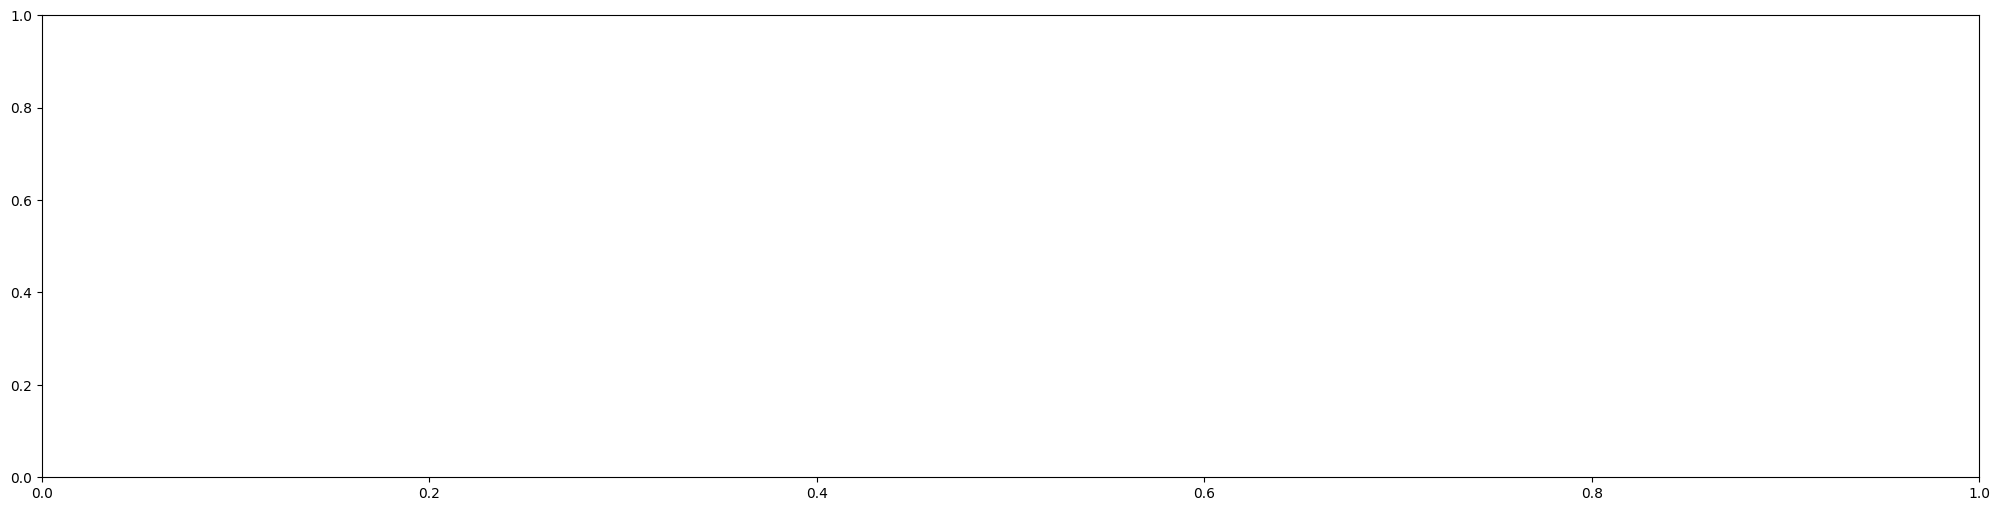

In [ ]:
color='red'
size=2
fig, ax = plt.subplots()
fig.set_size_inches(25, 6)
df_iznos.plot(x='Период', y='Пробег за период', kind='scatter', title='График зависимости периода износа от пробега', ax=ax, color=color, s=size)
plt.xlabel('Период (дней)')
plt.ylabel('Пробег (км)')
plt.show

In [ ]:
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    '''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
    '''
    # Двумерный массив для новой популяции
    newpopul = []

    # Сортируем зачения в val в зависимости от параметра reverse
    sval = sorted(val, reverse=reverse)

    # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
    for i in range(nsurv):

        # Получаем индекс i-того элемента sval в исходном массиве val
        index = val.index(sval[i])
        # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
        newpopul.append(popul[index])

    # Возвращаем новую популяцию (из nsurv элементов) и сортированный список
    return newpopul, sval

In [ ]:
def getParents(
        curr_popul,
        nsurv
        ):

    '''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
    '''
    # Получаем дважды случайный индекс родителе в диапазоне от 0 до nsurv - 1
    indexp1 = random.randint(0, nsurv - 1)
    indexp2 = random.randint(0, nsurv - 1)

    # Получаем первого бота-родителя по indexp1
    botp1 = curr_popul[indexp1]

    # Получаем второго бота-родителя по indexp2
    botp2 = curr_popul[indexp2]

    # Возвращаем обоих полученных ботов
    return botp1, botp2

In [ ]:
def crossPointFrom2Parents(
        botp1,
        botp2,
        idx
        ):

    '''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - idx - номер компонента бота
    '''

    # Получаем случайное число в диапазоне от 0 до 1
    pindex = random.random()

    # Если pindex меньше 0.5, то берем ген первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[idx]
    else:
        x = botp2[idx]

    # Возвращаем значние гена
    return x

In [ ]:

n = 100          # Размер популяции
nsurv = 20       # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv # Количество новых (столько новых ботов создается)
l = 8            # Длина бота
epohs = 500      # Количество эпох

mut = 0.25       # Коэфициент мутаций

popul = []       # Двумерный массив популяции, размерностью [n, l]. 100 ботов по 8 компонентов каждый
val = []         # Одномерный массив значений этих ботов

# Проходим по всей длине популяции
for i in range(n):

    # Создаем пустого бота
    popul.append([])


    # Проходим по всей длине бота
    for j in range(l):

        # В каждый компонент бота записываем рандомное значение
        popul[i].append(random.random())

# Пробегаемся по всем эпохам
for it in range(epohs):

    # Создаем пустой список для значений ботов
    val = []

    # Проходим по всей длине популяции
    for i in range(n):
        # Берем очередного бота
        bot = popul[i]

        # в каждом боте должны быть закодированы парные значения x-y
        x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # первые 4 значения отводим для Х
        y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # вторые 4 значения - для Y

        # для кодирования применяем эту функцию
        f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y

        # добавляем модуль значения в список на эпоху
        val.append(abs(f))

    # Получаем новую популяцию и сортированный список значнией
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)
    # Выводим 5 лучших ботов
    print(it, " ", [round(s,8) for s in sval[0:5]])

    # Проходимся в цикле nnew-раз
    for i in range(nnew):

        # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        botp1, botp2 = getParents(newpopul, nsurv)
        # Массив для нового бота
        newbot = []

        # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
        for j in range(l):

            # Получаем значение для j-ого компонента бота
            x = crossPointFrom2Parents(botp1, botp2, j)
            # Добавляем к значению бота случайную величину, зависящую от коэфециента мутации
            x += mut*(2*random.random() - 1.0)
            # Добавляем новое значение в бота
            newbot.append(x) # Добавялем новое значение в бота

        # Добавляем бота в новую популяцию
        newpopul.append(newbot)

        #(таким образом к nsurv-лучших ботов предыдующей популяции добавится nnew-новых ботов)

    # Записываем в popul посчитанную новую популяцию
    popul = newpopul

# Берем первого (лучшего) бота в финальной популяции
bot = popul[0]

# Считаем x
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]

# Считаем y
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]

# Считаем значение функции
f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y

# Выводим бота (8 компонент)
print(bot)

# Выводим значения x и y
print("x =",x, "y =", y)

# Выводим значение функции (которое должно быть максимально близко к 0 по условию задачи)
print("f =",f)

for i in range(20):

    bot = popul[i]
    x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]
    y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7]
    f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y

    print(f'x = {x}, y = {y}, f = {f}')

0   [8.18869998, 9.98066219, 10.52597752, 11.01267106, 11.45830909]
1   [8.13910432, 8.16037269, 8.18869998, 8.20709738, 8.33069303]
2   [8.13910432, 8.15347966, 8.16037269, 8.17367585, 8.17568632]
3   [7.99090614, 8.01509521, 8.0293507, 8.09486711, 8.10635751]
4   [7.99090614, 8.01509521, 8.0293507, 8.0676423, 8.09486711]
5   [7.99090614, 7.99263963, 8.01432076, 8.01509521, 8.01641711]
6   [7.95454385, 7.99090614, 7.99263963, 8.00498269, 8.01432076]
7   [7.95454385, 7.99090614, 7.99263963, 7.99538729, 8.00498269]
8   [7.95454385, 7.99057532, 7.99090614, 7.99263963, 7.99538729]
9   [7.95454385, 7.99057532, 7.99090614, 7.99263963, 7.99538729]
10   [7.9200319, 7.95454385, 7.99057532, 7.99090614, 7.99263963]
11   [7.9200319, 7.95454385, 7.95677402, 7.99057532, 7.99090614]
12   [7.9200319, 7.95454385, 7.95677402, 7.98023183, 7.98389434]
13   [7.88934673, 7.9200319, 7.95149655, 7.95454385, 7.95677402]
14   [7.8850455, 7.88884496, 7.88934673, 7.9089213, 7.9200319]
15   [7.8850455, 7.88884496